<a href="https://colab.research.google.com/github/vijaythapakdata/linearRegression/blob/main/TitanicSurvival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd

In [33]:
df=pd.read_csv("/train.csv")

In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [36]:
df.drop(['PassengerId',  'Name',  'SibSp',
       'Parch', 'Ticket', 'Cabin', 'Embarked'],axis="columns",inplace=True)

In [37]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [38]:
#survived is our targeted variable time to drop it from table
target=df.Survived
inputs=df.drop("Survived",axis="columns")

In [39]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [40]:
#create a dummy varible for Sex columns since machine learning can only understand numeric data
#pandas has get.dummies library
dummies=pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [41]:
#merge it to the main table
#pandas has cocat function to do so
inputs=pd.concat([inputs,dummies],axis="columns")
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,0,1
1,1,female,38.0,71.2833,1,0
2,3,female,26.0,7.9250,1,0
3,1,female,35.0,53.1000,1,0
4,3,male,35.0,8.0500,0,1


In [42]:
#now drop sex column because it is of no use of this column further in this model
inputs.drop(["Sex"],axis="columns",inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,0,1
1,1,38.0,71.2833,1,0
2,3,26.0,7.9250,1,0
3,1,35.0,53.1000,1,0
4,3,35.0,8.0500,0,1


In [43]:
#check whether this table contain any nan data
#pandas has .coulmns(x.isna().any()) function
inputs.columns[inputs.isna().any()]


Index(['Age'], dtype='object')

In [44]:
#now check at what place age column contains this
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [47]:
#correct data
inputs.Age=inputs.Age.fillna(inputs.Age.mean())
inputs.head(10)

,Pclass,Age,Fare,female,male
0,3,22.000000,7.2500,0,1
1,1,38.000000,71.2833,1,0
2,3,26.000000,7.9250,1,0
3,1,35.000000,53.1000,1,0
4,3,35.000000,8.0500,0,1
5,3,29.699118,8.4583,0,1
6,1,54.000000,51.8625,0,1
7,3,2.000000,21.0750,0,1
8,3,27.000000,11.1333,1,0
9,2,14.000000,30.0708,1,0


In [64]:
#train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(inputs,target,test_size=0.25)

In [66]:
#import model
from sklearn.naive_bayes import GaussianNB
model.fit(x_train,y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [67]:
model.score(x_test,y_test)

0.7892376681614349

In [68]:
x_test[:10]

,Pclass,Age,Fare,female,male
628,3,26.000000,7.8958,0,1
501,3,21.000000,7.7500,1,0
426,2,28.000000,26.0000,1,0
861,2,21.000000,11.5000,0,1
305,1,0.920000,151.5500,0,1
495,3,29.699118,14.4583,0,1
71,3,16.000000,46.9000,1,0
102,1,21.000000,77.2875,0,1
610,3,39.000000,31.2750,1,0
454,3,29.699118,8.0500,0,1


In [69]:
y_test[:10]

628    0
501    0
426    1
861    0
305    1
495    0
71     0
102    0
610    0
454    0
Name: Survived, dtype: int64

In [72]:
model.predict_proba(x_test[:10])

array([[0.98914881, 0.01085119],
       [0.0464026 , 0.9535974 ],
       [0.02426626, 0.97573374],
       [0.9742806 , 0.0257194 ],
       [0.00126961, 0.99873039],
       [0.9900027 , 0.0099973 ],
       [0.02726163, 0.97273837],
       [0.64296878, 0.35703122],
       [0.05336621, 0.94663379],
       [0.98976621, 0.01023379]])

In [73]:
#create confusion metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

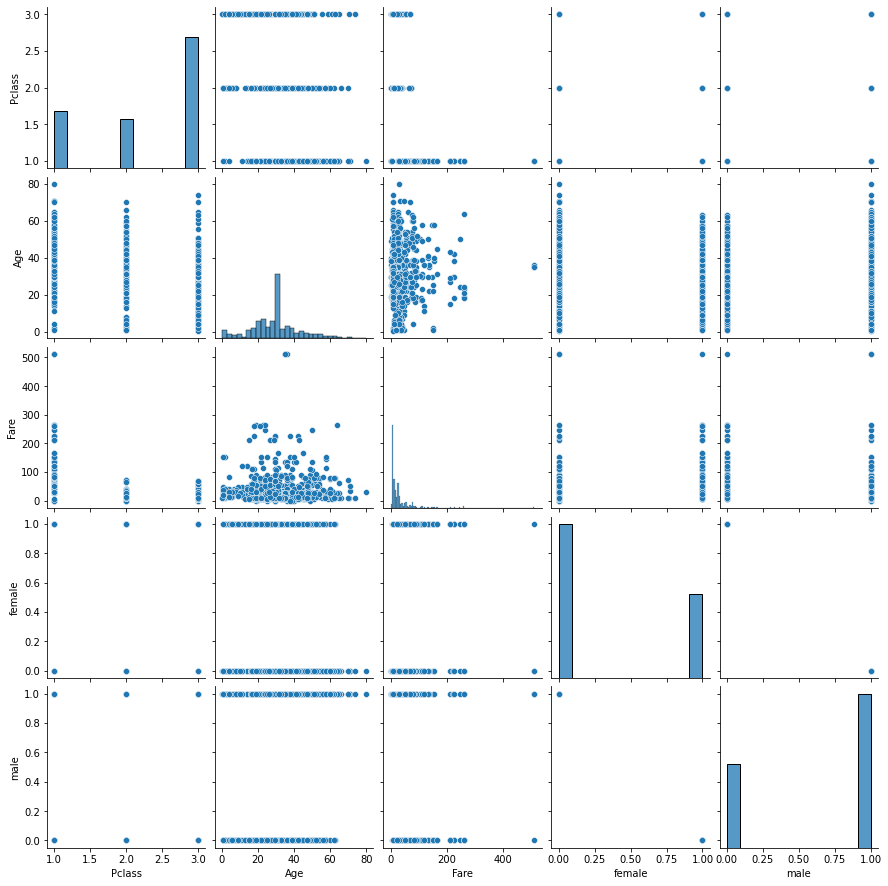

In [75]:
sns.pairplot(inputs)

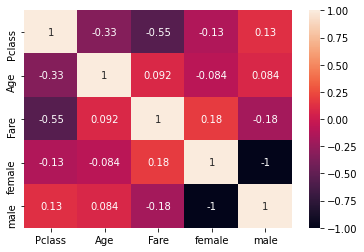

In [76]:
sns.heatmap(inputs.corr(),annot=True)